#Quiz
> 다음 사이트에서 데이터를 다운받아 분석하시오
* https://data.seoul.go.kr/dataList/10280/S/2/datasetView.do
1. 여러분이 서울 시장이라고 가정하고 서울 시민의 건강 관리를 위해 운동 공원을 만드려고 한다. 데이터를 분석하여 어디에 만들지 결과를 도출하시오
2. 여러분이 헬스장을 오픈하려 합니다. 성공적으로 오픈하려면 어디에 오픈하고 어떤 이벤트를 진행해야할 지 결과를 도출하시오

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 파일 읽어오기

In [2]:
url = '/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/report.txt'
df = pd.read_csv(url, delimiter='\t')
df.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


#2. 문제 1번
> 서울시시장, 운동공원 어디설치?


> 공공시설인 운동공원을 조성한다면, 각 성별, 나이, 학력, 소득 등의 이유보다 전체를 포함한 지역별 조사를 봐야한다. 따라서 아래 대분류와 분류가 값이 같은 행의 대분류값을 지역별로 설정하고, 데이터프레임을 따로 만들도록 하겠다.

In [3]:
#대분류에 지역별 이름을 붙혀준다
df.iloc[27:]['대분류'] = '지역별'
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,2019,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,2019,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,2019,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,2019,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,2019,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [4]:
#지역별 데이터프레임을 만들어준다.
df_location = df.iloc[27:]
df_location

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
27,2019,지역별,종로구,62.2,0.4,9.4,25.9,2.1,-
28,2019,지역별,중구,50.3,3.0,7.7,25.7,7.6,5.7
29,2019,지역별,용산구,48.9,7.5,4.9,32.6,2.7,3.4
30,2019,지역별,성동구,46.5,4.3,5.7,34.2,8.7,0.6
31,2019,지역별,광진구,42.0,5.7,3.0,43.5,5.8,-
32,2019,지역별,동대문구,44.5,4.5,2.7,41.9,6.2,0.1
33,2019,지역별,중랑구,46.7,2.2,6.8,32.8,10.9,0.5
34,2019,지역별,성북구,33.3,3.4,2.6,58.0,2.0,0.7
35,2019,지역별,강북구,21.3,5.3,3.4,68.1,1.9,-
36,2019,지역별,도봉구,52.0,3.2,6.2,30.8,7.6,0.3


> 운동공원이 필요한 시민은 운동을 할 충분한 비용이 없는 시민일 것이다. 또 주변 운동을 할 만한 장소가 없는 장소에도 운동공원이 필요할 것이다.

> 따라서, 두 컬럼별로 정렬을 해본다.

In [5]:
df_location.sort_values('운동을 할 만한 장소가 없어서', ascending=False).head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
27,2019,지역별,종로구,62.2,0.4,9.4,25.9,2.1,-
46,2019,지역별,동작구,39.1,13.9,8.4,31.1,7.6,-
28,2019,지역별,중구,50.3,3.0,7.7,25.7,7.6,5.7
38,2019,지역별,은평구,42.7,8.8,7.3,34.3,6.4,0.5
33,2019,지역별,중랑구,46.7,2.2,6.8,32.8,10.9,0.5


In [6]:
df_location.sort_values('운동을 할 충분한 비용이 없어서', ascending=False).head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
33,2019,지역별,중랑구,46.7,2.2,6.8,32.8,10.9,0.5
30,2019,지역별,성동구,46.5,4.3,5.7,34.2,8.7,0.6
51,2019,지역별,강동구,47.0,5.2,4.8,32.4,8.4,2.3
46,2019,지역별,동작구,39.1,13.9,8.4,31.1,7.6,-
36,2019,지역별,도봉구,52.0,3.2,6.2,30.8,7.6,0.3


##1.1
> 운동공원이 공공시설임을 생각하면 운동을 할 충분한 비용이 없는 시민을 위해 공원을 조성하는게 바람직하다. 이 설문조사 수치가 높은 지역은 중랑구이며, 또한 중랑구는 운동을 할 만한 장소가 없는 지역 순위에도 5위에 올라있기 때문에 두가지 조건을 충분히 만족한다 볼 수 있다. 

> **따라서 운동공원을 조성한다면 중랑구로 선택하는것이 바람직하다.**

#문제 2번

> 여러분이 헬스장을 오픈하려 합니다. 성공적으로 오픈하려면 어디에 오픈하고 어떤 이벤트를 진행해야할 지 결과를 도출하시오

> 헬스장의 목적은 수익창출이다. 운동을 싫어하는 사람과, 기타, 또 마음이 아프지만 운동 비용이 부족한 사람은 수익창출에 영향을 주지 않을거라 생각하여 제거한다.

In [7]:
df_for_rich = df[['기간','대분류', '분류', '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서',	'운동을 할 만한 장소가 없어서']]
df_for_rich

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서
0,2019,서울시,서울시,46.8,5.0,4.3
1,2019,성별,남자,52.4,4.4,4.9
2,2019,성별,여자,42.5,5.6,3.9
3,2019,연령별,10대,55.3,4.8,3.9
4,2019,연령별,20대,46.0,4.2,4.5
5,2019,연령별,30대,59.9,5.2,2.9
6,2019,연령별,40대,54.1,3.9,2.9
7,2019,연령별,50대,46.1,6.2,4.5
8,2019,연령별,60대 이상,26.6,6.0,6.6
9,2019,학력별,중졸 이하,24.7,6.2,4.8


>수익의 영향을 줄 수 있는 3가지 열을 내림차순으로 정렬하여 top5를 뽑아본다.

In [8]:
df_for_rich.sort_values('운동을 할 충분한 시간이 없어서', ascending=False).head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서
39,2019,지역별,서대문구,69.8,0.8,1.2
41,2019,지역별,양천구,66.2,5.7,5.9
27,2019,지역별,종로구,62.2,0.4,9.4
12,2019,학력별,대학원 이상,61.2,3.0,5.6
5,2019,연령별,30대,59.9,5.2,2.9


In [9]:
df_for_rich.sort_values('함께 운동을 할 사람이 없어서', ascending=False).head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서
46,2019,지역별,동작구,39.1,13.9,8.4
47,2019,지역별,관악구,44.4,8.8,5.5
38,2019,지역별,은평구,42.7,8.8,7.3
13,2019,소득별,100만원 미만,10.7,8.4,9.9
40,2019,지역별,마포구,46.6,8.1,4.7


In [10]:
df_for_rich.sort_values('운동을 할 만한 장소가 없어서', ascending=False).head(5)

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서
13,2019,소득별,100만원 미만,10.7,8.4,9.9
27,2019,지역별,종로구,62.2,0.4,9.4
46,2019,지역별,동작구,39.1,13.9,8.4
28,2019,지역별,중구,50.3,3.0,7.7
38,2019,지역별,은평구,42.7,8.8,7.3


## 2.1 위치
> 앞 세가지 데이터프레임을 봤을때 양천구, 동작구, 관악구를 지도에서 검색해보면 이 세 구는 지도상 매우 가까운 거리에 있는것을 볼 수 있다. 따라서 이 세 구의 중간 위치에서 장소를 설정하면 효과적일 것이다.

> 먼저 운동을 할 충분한 시간이 없어서의 정렬 데이터프레임을 보면 
양천구가 66.2%로 2위를 차지했다. 이 점을 공략하려면 ***최대한 가까운 곳***을 선택하는게 좋을 것이다.

> 두번째로 함께 운동을 할 사람이 없어서의 정렬 데이터프레임을 보면
동작구가 1위, 관악구가 2위임을 알 수 있다. 이 점으로 ***거리가 조금 있어도 커뮤니티***를 만들어주면 단골손님이 될만한 고객들이 있다는것을 생각해볼 수 있다.

> 세번째로 운동을 할 만한 장소가 없어서의 정렬을 보면
동작구가 지역별로는 2위를 차지함을 알 수 있다.  장소가 없다는것은 근처에 헬스장이 없는점이 문제, 라고 생각할 수 있다.
그렇다면 ***동작구랑도 가까워야 할 것***이다.

***이 세가지 점을 생각해봤을때 지도상 구로역, 신도림역, 신길역 이 세 역을 따라가는 위치에 헬스장의 위치를 선정하는 것이 좋다.***

> 또 어떤 전략으로 운영을 해야할지 알아보자

In [11]:
df_customer = df.iloc[:27, 1:-2]
df_customer

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서
0,서울시,서울시,46.8,5.0,4.3,37.3
1,성별,남자,52.4,4.4,4.9,32.4
2,성별,여자,42.5,5.6,3.9,41.0
3,연령별,10대,55.3,4.8,3.9,32.6
4,연령별,20대,46.0,4.2,4.5,38.8
5,연령별,30대,59.9,5.2,2.9,27.3
6,연령별,40대,54.1,3.9,2.9,35.5
7,연령별,50대,46.1,6.2,4.5,36.8
8,연령별,60대 이상,26.6,6.0,6.6,48.7
9,학력별,중졸 이하,24.7,6.2,4.8,48.6


> 가장 큰 분류를 먼저 알아보자, 따로 슬라이싱 하지 않아도 운동을 하지 않는 이유증 가장 큰 두가지 이유는 운동을 할 시간이 없다는 것과, 운동을 싫어하기 때문이다.

>  

In [12]:
df_cus_des = df_customer.groupby('대분류').describe()
df_cus_des.iloc[0:, 2:]

운동을 할 충분한 시간이 없어서                       ... 운동을 싫어해서                    
                    std   min     25%    50%  ...      25%    50%    75%   max
대분류                                           ...                             
서울시                 NaN  46.8  46.800  46.80  ...   37.300  37.30  37.30  37.3
성별             7.000357  42.5  44.975  47.45  ...   34.550  36.70  38.85  41.0
소득별           16.184241  10.7  32.900  45.40  ...   36.300  39.10  46.70  50.7
연령별           11.812536  26.6  46.025  50.10  ...   33.325  36.15  38.30  48.7
지역대분류          3.732559  44.5  46.300  47.10  ...   31.400  35.90  38.90  40.6
학력별           15.683404  24.7  39.400  48.70  ...   32.750  36.30  41.10  48.6
혼인상태별         10.390541  31.5  40.100  48.70  ...   36.200  37.30  39.85  42.4

[7 rows x 30 columns]

#강사님 코드

In [13]:
url = '/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/report.txt'
df = pd.read_csv(url, delimiter='\t')
df.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [14]:
#결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 52 non-null     int64  
 1   대분류                52 non-null     object 
 2   분류                 52 non-null     object 
 3   운동을 할 충분한 시간이 없어서  52 non-null     float64
 4   함께 운동을 할 사람이 없어서   52 non-null     float64
 5   운동을 할 만한 장소가 없어서   52 non-null     float64
 6   운동을 싫어해서           52 non-null     float64
 7   운동을 할 충분한 비용이 없어서  52 non-null     float64
 8   기타                 52 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.8+ KB


> 결측치는 없다.

In [15]:
df.describe()

,기간,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2019.0,46.267308,5.103846,4.655769,37.153846,5.163462
std,0.0,10.723709,2.211109,1.868145,8.666217,2.020001
min,2019.0,10.700000,0.400000,1.200000,17.900000,0.900000
25%,2019.0,42.775000,4.125000,3.300000,32.550000,4.075000
50%,2019.0,46.900000,4.850000,4.400000,35.850000,5.250000
75%,2019.0,52.100000,6.050000,5.700000,39.775000,6.250000
max,2019.0,69.800000,13.900000,9.900000,68.100000,10.900000


> 위의 데이터를 분석해 보면 '운동을 싫어해서' 라고 하는 사람 이외에는 운동을 하고자 하는 의지가 있다고 판단할 수 있다.

> 1번 문제에서 운동 공원을 만들기 위해서는 다음 상황에 맞는 위치를 찾는것이 좋을 듯 하다.
* 운동을 할 충분한 시간이 없어서 : 응답이 가장 적은 위치
* 함께 운동을 할 사람이 없어서 : 운동을 하면서 친해질 수 있으니 배제
* 운동을 할 만한 장소가 없어서 : 응답이 많은 위치를 선정
* 운동을 할 충분한 비용이 없어서 : 응답이 많은 위치를 선정

> 결론적으로 ' 운동을 할 만한 장소가 없어서'와 '운동을 할 충분한 비용이 없어서'의 응답이 많은 지역 중 '운동을 할 충분한 시간이 없어서'의 응답이 가장 적으니 지역을 찾아 운동시설을 만들면 될 듯 하다.

## 3. 문제 해결을 위한 데이터 정제

In [16]:
df.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


> head와 tail 그리고 describe를 통해 확인한 결과 기간은 2019년도로 고정되어 있어 분석에 필요없는 데이터 이다. drop_duplicates함수를 이용하여 2019이외의 다른값이 있는지 확인해보고 중복을 제거해 보자

###3.1 기간 확인 및 중복제거

In [17]:
df.drop_duplicates('기간').count()

기간                   1
대분류                  1
분류                   1
운동을 할 충분한 시간이 없어서    1
함께 운동을 할 사람이 없어서     1
운동을 할 만한 장소가 없어서     1
운동을 싫어해서             1
운동을 할 충분한 비용이 없어서    1
기타                   1
dtype: int64

In [18]:
df.drop(labels=['기간'], axis=1, inplace=True)
df.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


###3.2 대분류 확인 및 중복 제거

In [19]:
df['대분류'].drop_duplicates()

0       서울시
1        성별
3       연령별
9       학력별
13      소득별
19    혼인상태별
22    지역대분류
27      종로구
28       중구
29      용산구
30      성동구
31      광진구
32     동대문구
33      중랑구
34      성북구
35      강북구
36      도봉구
37      노원구
38      은평구
39     서대문구
40      마포구
41      양천구
42      강서구
43      구로구
44      금천구
45     영등포구
46      동작구
47      관악구
48      서초구
49      강남구
50      송파구
51      강동구
Name: 대분류, dtype: object

> 대분류 결과를 보면 다음과 같다.
* 서울시 : 전체 정리 내용
* 성별 : 남, 녀를 기준으로 분류되어 있음
* 연령별 : 10~60대 이상으로 분류
* 학력별 : 중, 고 , 대 , 대학원으로 분류
* 소득별 : 100만원 미만~ 500이상
* 혼인상태별 : 기혼, 미혼, 이별사혼기타로 분류
* 지역 대분류 : 도심권, 동북권, 서북권, 서남권, 동남권으로 분류
* 위 내용을 제외한 나머지 정보는 구 별 정보임

####3.2.1 1번문제

In [20]:
df.tail()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
47,관악구,관악구,44.4,8.8,5.5,34.2,6.1,1
48,서초구,서초구,49.9,4.3,4.1,36.6,3.3,1.8
49,강남구,강남구,40.7,4.2,2.0,46.4,5.2,1.6
50,송파구,송파구,47.6,5.0,2.3,39.4,4.8,1
51,강동구,강동구,47.0,5.2,4.8,32.4,8.4,2.3


In [21]:
df_location = df.iloc[27:, 1:-2]
df_location.to_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/report_to_csv_location.csv')
df_location

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서
27,종로구,62.2,0.4,9.4,25.9
28,중구,50.3,3.0,7.7,25.7
29,용산구,48.9,7.5,4.9,32.6
30,성동구,46.5,4.3,5.7,34.2
31,광진구,42.0,5.7,3.0,43.5
32,동대문구,44.5,4.5,2.7,41.9
33,중랑구,46.7,2.2,6.8,32.8
34,성북구,33.3,3.4,2.6,58.0
35,강북구,21.3,5.3,3.4,68.1
36,도봉구,52.0,3.2,6.2,30.8


In [22]:
df_gu=df[~df['대분류'].isin(['서울시', '성별', '연령별', '학력별', '소득별', '혼인상태별', '지역대분류'])]
df_gu

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
27,종로구,종로구,62.2,0.4,9.4,25.9,2.1,-
28,중구,중구,50.3,3.0,7.7,25.7,7.6,5.7
29,용산구,용산구,48.9,7.5,4.9,32.6,2.7,3.4
30,성동구,성동구,46.5,4.3,5.7,34.2,8.7,0.6
31,광진구,광진구,42.0,5.7,3.0,43.5,5.8,-
32,동대문구,동대문구,44.5,4.5,2.7,41.9,6.2,0.1
33,중랑구,중랑구,46.7,2.2,6.8,32.8,10.9,0.5
34,성북구,성북구,33.3,3.4,2.6,58.0,2.0,0.7
35,강북구,강북구,21.3,5.3,3.4,68.1,1.9,-
36,도봉구,도봉구,52.0,3.2,6.2,30.8,7.6,0.3


> isin 함수는 선택된 feature에서 존재하는 값이면 True를 반환하는 함수 이다. 틸트(~)를 이용하여 존재하지 않는 값만 출력하는 형식으로 구현하여 구 정보만 추출하였다.

In [23]:
df_gu.drop(labels=['대분류'], axis=1, inplace=True)
df_gu

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
27,종로구,62.2,0.4,9.4,25.9,2.1,-
28,중구,50.3,3.0,7.7,25.7,7.6,5.7
29,용산구,48.9,7.5,4.9,32.6,2.7,3.4
30,성동구,46.5,4.3,5.7,34.2,8.7,0.6
31,광진구,42.0,5.7,3.0,43.5,5.8,-
32,동대문구,44.5,4.5,2.7,41.9,6.2,0.1
33,중랑구,46.7,2.2,6.8,32.8,10.9,0.5
34,성북구,33.3,3.4,2.6,58.0,2.0,0.7
35,강북구,21.3,5.3,3.4,68.1,1.9,-
36,도봉구,52.0,3.2,6.2,30.8,7.6,0.3


> 구별 데이터 추출을 했지만 대분류와 분류가 같은 구 정보를 갖고 있음으로 대분류를 제거하였다.

In [24]:
#데이터 저장
df_gu.to_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/report_to_csv_location.csv')

* 추후 분석 시 활용할 수도 있음으로 파일로 만들어 둠
* 현재 사용하진 않을 것.

####3.2.2 2번 문제
> 헬스장 오픈 위치는 구별 정보를 사용하면 되며, 홍보 시 성별, 나이별 데이터를 활용할 예정이다.

> 성별, 나이별 데이터를 각각 파일로 만드시오.

#####3.2.2.1 성별데이터 추출 및 백업

In [25]:
df_gender = df[df['대분류'] == '성별']
df_gender.to_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/report_to_csv_sex.csv')
df_gender

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7


In [26]:
df_age = df[df['대분류'] == '연령별']
df_age.to_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/report_to_csv_age.csv')
df_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6


#####3.2.2.2 연령별데이터 추출 및 백업

In [27]:
df_age =df[df['대분류'].isin(['연령별'])]
df_age.to_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/report_to_csv_age.csv')

##4. 퀴즈1 풀이
> 여러분이 서울 시장이라 가정하고 서울 시시민의 건강 관리를 위해 운동 공원을 만들려고 한다. 데이터를 분석하여 어디에 만들지 결과를 도출하시오

###4.1 파일읽기
> 구 정보를 읽어 describe()정보를 확인하시오

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/report_to_csv_location.csv')
df.head()

,Unnamed: 0,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,27,종로구,62.2,0.4,9.4,25.9,2.1,-
1,28,중구,50.3,3.0,7.7,25.7,7.6,5.7
2,29,용산구,48.9,7.5,4.9,32.6,2.7,3.4
3,30,성동구,46.5,4.3,5.7,34.2,8.7,0.6
4,31,광진구,42.0,5.7,3.0,43.5,5.8,-


### 4.2 정렬 및 부분 추출
> '운동을 할만한 장소가 없어서'를 기준으로 내림차순으로 정렬하고 '분류', '운동을 할 만한 장소가 없어서', '운동을 할 충분한 비용이 없어서' 이 세가지 결과만 출력하시오

In [29]:
df_gu_sort = df_gu.sort_values(by=['운동을 할 만한 장소가 없어서'], axis=0)
df_gu_sort

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
39,서대문구,69.8,0.8,1.2,21.9,5.3,1
42,강서구,38.5,3.8,1.9,50.5,4.3,1
49,강남구,40.7,4.2,2.0,46.4,5.2,1.6
44,금천구,53.6,2.4,2.3,37.6,2.3,1.7
50,송파구,47.6,5.0,2.3,39.4,4.8,1
34,성북구,33.3,3.4,2.6,58.0,2.0,0.7
32,동대문구,44.5,4.5,2.7,41.9,6.2,0.1
37,노원구,56.3,1.6,2.7,30.1,1.9,7.4
31,광진구,42.0,5.7,3.0,43.5,5.8,-
35,강북구,21.3,5.3,3.4,68.1,1.9,-


In [30]:
df_gu_sort_part = df_gu_sort[['분류','운동을 할 만한 장소가 없어서','운동을 할 충분한 비용이 없어서']]
df_gu_sort_part

,분류,운동을 할 만한 장소가 없어서,운동을 할 충분한 비용이 없어서
39,서대문구,1.2,5.3
42,강서구,1.9,4.3
49,강남구,2.0,5.2
44,금천구,2.3,2.3
50,송파구,2.3,4.8
34,성북구,2.6,2.0
32,동대문구,2.7,6.2
37,노원구,2.7,1.9
31,광진구,3.0,5.8
35,강북구,3.4,1.9


In [31]:
df_gu_sort_part.rename(
    columns={
      df_gu_sort_part.columns[0] : '구분',
      df_gu_sort_part.columns[1] : '장소부족',
      df_gu_sort_part.columns[2] : '비용부족'
    },
    inplace=True
)

df_gu_sort_part

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,구분,장소부족,비용부족
39,서대문구,1.2,5.3
42,강서구,1.9,4.3
49,강남구,2.0,5.2
44,금천구,2.3,2.3
50,송파구,2.3,4.8
34,성북구,2.6,2.0
32,동대문구,2.7,6.2
37,노원구,2.7,1.9
31,광진구,3.0,5.8
35,강북구,3.4,1.9


> rename은 columns 정보를 변결할 떄 사용되는 함수이다. 
위에서 보듯이 columns 정보를 dict 형식으로 입력받아 각 위치의 정보를 변경할 수 있다.

> 장소부족과 비용부족의 비율을 6:4로 주어 각 수치에 가중치를 적용한 점수를 구하여 종합 점수로 구분 짓고, 종합점수 기준으로 top5만 추출할 수 있도록 코딩하시오

In [32]:
df_gu_sort_part['종합점수'] = df_gu_sort_part['장소부족']*0.6 +df_gu_sort_part['비용부족']*0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_gu_sort_part

,구분,장소부족,비용부족,종합점수
39,서대문구,1.2,5.3,2.84
42,강서구,1.9,4.3,2.86
49,강남구,2.0,5.2,3.28
44,금천구,2.3,2.3,2.30
50,송파구,2.3,4.8,3.30
34,성북구,2.6,2.0,2.36
32,동대문구,2.7,6.2,4.10
37,노원구,2.7,1.9,2.38
31,광진구,3.0,5.8,4.12
35,강북구,3.4,1.9,2.80


> 장소 부족과 비용 부족의 비율이 6:4임으로 비율에 맡게 각 데이터에 곱하여 종합점수를 구하였다.

In [34]:
df_gu_sort_part_top5 = df_gu_sort_part.sort_values(['종합점수'], ascending=False).head()
df_gu_sort_part_top5

,구분,장소부족,비용부족,종합점수
33,중랑구,6.8,10.9,8.44
46,동작구,8.4,7.6,8.08
28,중구,7.7,7.6,7.66
38,은평구,7.3,6.4,6.94
30,성동구,5.7,8.7,6.90


> 종합점수 기준으로 ascending 옵션을 적용하여 내림차순으로 정렬한 후 head함수를 이용하여 top5를 선정했다.

###4.3 시각화

> 한글 깨짐 현상을 해결하게 위해 나눔고딕을 설치 한 후 위와같이 그래프에 설정을 한다,

In [36]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [37]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

> 퀴즈1은 아래 그래프에서 이후 상황에 맞는 구를 정하면 될 것이다.

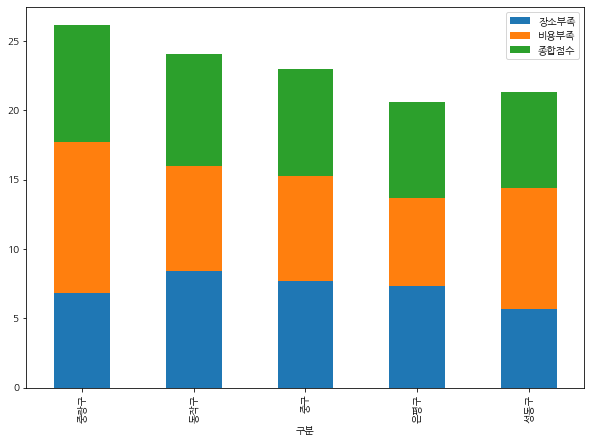

In [41]:
#df_gu_sort_part_top5.plot(x='구분', kind='bar')
df_gu_sort_part_top5.plot(x='구분', kind='bar', stacked=True, figsize=(10, 7))
plt.show()

##5. quiz2
> 여러분이 헬스장을 오픈하려 합니다. 성공적으로 헬스장을 운영하기 위한 여러 방안들을 분석하여 운영계획을 수립해 보세여ㅛ

In [65]:
dir = '/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/'
file_url = ['report_to_csv_age.csv', 'report_to_csv_sex.csv', 'report_to_csv_location.csv']

df_age = pd.read_csv(dir+file_url[0])
df_gender = pd.read_csv(dir+file_url[1])
df_gu = pd.read_csv(dir+file_url[2])

> 3개의 파일이 같은 경로에 있음으로 별도로 dir이라는 변수에 경로를 저장하고 각 파일명은 리스트로 만들어 파일을 불러왔다.

In [66]:
df_age

,Unnamed: 0,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
1,4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
2,5,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
3,6,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
4,7,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
5,8,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6


In [67]:
#df_age.drop(labels='Unnamed: 0', axis = 1, inplace=True)

def remove_unnamed(data_frame):
  data_frame.drop(labels='Unnamed: 0', axis = 1, inplace=True)

remove_unnamed(df_age)
remove_unnamed(df_gender)
remove_unnamed(df_gu)

In [68]:
df_gu

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,종로구,62.2,0.4,9.4,25.9,2.1,-
1,중구,50.3,3.0,7.7,25.7,7.6,5.7
2,용산구,48.9,7.5,4.9,32.6,2.7,3.4
3,성동구,46.5,4.3,5.7,34.2,8.7,0.6
4,광진구,42.0,5.7,3.0,43.5,5.8,-
5,동대문구,44.5,4.5,2.7,41.9,6.2,0.1
6,중랑구,46.7,2.2,6.8,32.8,10.9,0.5
7,성북구,33.3,3.4,2.6,58.0,2.0,0.7
8,강북구,21.3,5.3,3.4,68.1,1.9,-
9,도봉구,52.0,3.2,6.2,30.8,7.6,0.3


> 위의 내용을 다음과 같이 분석할 수 있다.

> 창업을 위한 분석은 이전에 진행했던 운동 곤원과는 다르게 접근해야 한다. 우선 배제해야 할 부분은 다음과 같다.
* 운동을 싫어해서
* 운동을 할 충분한 비용이 없어서

> 나머지 데이터로 우선 순위를 정하면 다음과 같다.
1. 운동을 할 만한 장소가 없어서 : 장소만 있으면 가능하다.
2. 함께 운동을 할 사람이 없어서 : PT를 통해 함께할 사람 연결
3. 운동을 할 충분한 시간이 없어서 : 가까운 거리에 헬스장이 있으면 운동을 할 가능성이 높아짐.

In [69]:
 df_gu.describe()

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,47.424000,4.980000,4.604000,36.584000,5.068000
std,9.970802,2.933286,2.230187,10.816256,2.473648
min,21.300000,0.400000,1.200000,17.900000,1.900000
25%,42.700000,3.200000,2.700000,31.100000,2.900000
50%,46.700000,4.500000,4.700000,34.200000,5.200000
75%,50.300000,5.700000,5.900000,39.400000,6.400000
max,69.800000,13.900000,9.400000,68.100000,10.900000


> 이전 문제에서 가중치를 적용하여 종합점수를 구했다. 하지만 각 점수들의 분포가 고르지 않기 때문에 정확한 점수를 환산하지 못했다.

> 각 점수의 구간은 다음과 같이 나타난다.
* 운동을 할 충분한 시간이 없어서 : 21.3~69.8 
* 함께 운동을 할 사람이 없어서 : 0.40~ 13.90
* 운동을 할 만한 장소가 없어서 : 1.20~9.40

> 위의 값들은 100점 기준으로 변환하려면 다음과 같은 수식을 적용할 수 있다.
* (x - min)*100 / (max-min)
* x : 산출할 데이터, min : 바닥값, max : 천정값
(max - min) : 범위

> apply 함수는 feature에 있는 각 정보들을 x로 받고 이 값을 오른쪽의 수식으로 변환하는 기능을 한다. '운동을 할 충분한 시간이 없어서' feature의 정보 중 최소값과 최대값을 구하고 100점으로 환산하는 코드이다.

In [ ]:
def Convert100(x, min, max):
  return (x - min)*100 / (max - min)

min_gu = df_gu['운동을 할 충분한 시간이 없어서'].min()
max_gu = df_gu['운동을 할 충분한 시간이 없어서'].max()

df_convert = df_gu
df_convert['운동을 할 충분한 시간이 없어서'] = df_gu['운동을 할 충분한 시간이 없어서'].apply(lambda x: Convert100(x, min_gu, max_gu))
df_convert

In [ ]:
feature = ['운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서', '운동을 할 만한 장소가 없어서']

df_convert = df_gu

for idx in range(3):
  min_gu = df_gu[feature[idx]].min()
  max_gu = df_gu[feature[idx]].max()
  df_convert[feature[idx]] = df_gu[feature[idx]].apply(lambda x: Convert100(x, min_gu, max_gu))

df_convert

> 구하고자 하는 3가지 feature정보를 리스트로 만들고 for문을 이용하여 반복해서 100점으로 치환했다.

In [86]:
def ConvertData(data_frame, feature):
  min = data_frame[feature].min()
  max = data_frame[feature].max()

  df_tmp = data_frame
  df_tmp[feature] = data_frame[feature].apply(lambda x: (x-min)*100/(max-min))

  return df_tmp

for idx in range(3):
  df_convert = ConvertData(df_gu, feature[idx])

df_convert

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,종로구,84.329897,0.000000,100.000000,25.9,2.1,-
1,중구,59.793814,19.259259,79.268293,25.7,7.6,5.7
2,용산구,56.907216,52.592593,45.121951,32.6,2.7,3.4
3,성동구,51.958763,28.888889,54.878049,34.2,8.7,0.6
4,광진구,42.680412,39.259259,21.951220,43.5,5.8,-
5,동대문구,47.835052,30.370370,18.292683,41.9,6.2,0.1
6,중랑구,52.371134,13.333333,68.292683,32.8,10.9,0.5
7,성북구,24.742268,22.222222,17.073171,58.0,2.0,0.7
8,강북구,0.000000,36.296296,26.829268,68.1,1.9,-
9,도봉구,63.298969,20.740741,60.975610,30.8,7.6,0.3


> 위와같이 별도의 함수를 만들어 처리할 수도 있다.

> columns정보를 다음 내용으로 변경하시오
* '분류', '시간부족', '함께할 사람', '장소없음'

In [104]:
# 필요한 4가지 컬럼만 선택한다.
rename_feature = ['분류', '시간부족', '함께할 사람', '장소없음']
df_convert_short.columns = ['분류', '시간부족', '함께할 사람', '장소없음']
df_convert_short

,분류,시간부족,함께할 사람,장소없음
0,종로구,84.329897,0.000000,100.000000
1,중구,59.793814,19.259259,79.268293
2,용산구,56.907216,52.592593,45.121951
3,성동구,51.958763,28.888889,54.878049
4,광진구,42.680412,39.259259,21.951220
5,동대문구,47.835052,30.370370,18.292683
6,중랑구,52.371134,13.333333,68.292683
7,성북구,24.742268,22.222222,17.073171
8,강북구,0.000000,36.296296,26.829268
9,도봉구,63.298969,20.740741,60.975610


###5.4 가중치
> 다음과 같이 가중치를 적용하여 종합점수를 구해보자
1. 장소없음 : 5
2. 함께할 사람 : 3
3. 시간 부족 : 2

In [109]:
df_convert_short['종합점수'] = df_convert_short['장소없음']*0.5 + df_convert_short['함께할 사람']*0.3 + df_convert_short['시간부족']*0.2
df_convert_short.sort_values(by='종합점수', ascending=False)

,분류,시간부족,함께할 사람,장소없음,종합점수
19,동작구,36.701031,100.000000,87.804878,81.242645
0,종로구,84.329897,0.000000,100.000000,66.865979
11,은평구,44.123711,62.222222,74.390244,64.686531
14,양천구,92.577320,39.259259,57.317073,58.951778
1,중구,59.793814,19.259259,79.268293,57.370687
20,관악구,47.628866,62.222222,52.439024,54.411952
16,구로구,49.484536,39.259259,56.097561,49.723465
2,용산구,56.907216,52.592593,45.121951,49.720197
9,도봉구,63.298969,20.740741,60.975610,49.369821
13,마포구,52.164948,57.037037,42.682927,48.885564


> 위와 같이 가중치를 적용하고 상위 Top5를 산출해 보았다.

* 장소 없음은 높은 점수여야 헬스장이 생기면 올 확률이 높다.
* 함께 할 사람은 높은 점수일 경우 PT를 등록하여 추가 매출로 연결할 수 있는 확률이 높다.
* 시간 부족은 낮은 수치여야 헬스장에 올 확률이 높다.

> 이를기본으로 분석해 보면 최적의 장소는 동작구이며 2순위는 은평구이다. 종로구의 경우 함께할 사람의 수치가 0이므로, 추가 매출이 어려워배제시킨다. 양천구의 경우 시간이 부족하여 못하는것이 높음으로 헬스장에 올 확률이 적다. 이를 기반으로 헬스장을 차릴 위치는 다음과 같은 순으로 추천해주면 된다.
* 동작구 -> 은평구 -> 중구

In [110]:
df_convert_part1 = df_convert_short[(df_convert_short['시간부족'] < 50) & (df_convert_short['함께할 사람'] > 50)]
df_convert_part1.sort_values(by='종합점수', ascending=False)

,분류,시간부족,함께할 사람,장소없음,종합점수
19,동작구,36.701031,100.000000,87.804878,81.242645
11,은평구,44.123711,62.222222,74.390244,64.686531
20,관악구,47.628866,62.222222,52.439024,54.411952


> 이전의 추천지역은 동작구, 은평구, 중구였고 여기서는 동작구, 은평구, 관악구로 나타난다. 수치의 분포로 봐서는 관락구의 수치가 더 좋게 나타난다. 구의 특징으로 본다면 중구는 상업지구이고 관악구는 생활지구인 것도 고려해야 한다. 이런 여러 상황을 고려하여 구를 추천하면 될 듯 하다.

###5.5 운동시설 구축

In [112]:
#df_gender
feature=[
         '운동을 할 충분한 시간이 없어서', '함께 운동을 할 사람이 없어서'
]

> 성별 정보를 확인하고 feature리스트를 만든다.

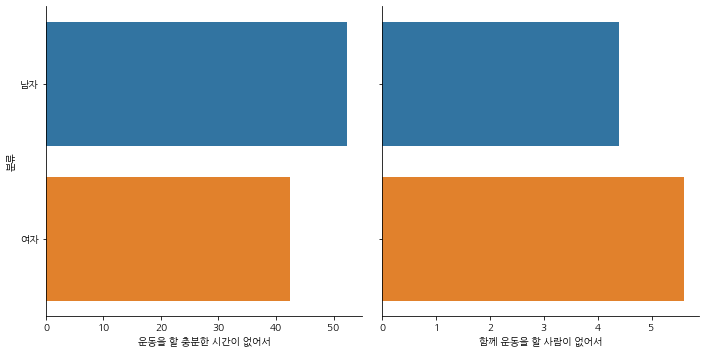

In [113]:
import seaborn as sns

pg = sns.PairGrid(df_gender, y_vars='분류', x_vars=feature, height=5, aspect=1)
pg.map(sns.barplot)

> 여자가 남자보다 시간이 많고 함께 할 사람이 없어서 못하는 경우도 많음으로 여자를 위한 시설을 만들고 함께 할 수 있는 시설 위주로 만들면 성공할 확률이 높다. 따라서 다음과 같은 시설을 만들면 될 듯하다.
* 줌바댄스
* 요가 
* 그룹PT

##5.6 홍보방안

> 5.5에서 분석한 내용 기반으로 홍보를 하며 추가적으로 나이 관련 내용도 확인해 보자

> 현재 기준 데이터 수치가 다름으로 100점 기준으로 치환해보자

In [134]:
col_list = list(df_age_short.columns[1:])
col_list

for col in col_list:
  min = df_age[col].min()
  max = df_age[col].max()

  df_age[col] = df_age[col].apply(lambda x: (x-min)*100 / (max-min))

df_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,연령별,10대,86.186186,39.130435,27.027027,32.6,3.5,-
1,연령별,20대,58.258258,13.043478,43.243243,38.8,6.4,0.1
2,연령별,30대,100.000000,56.521739,0.000000,27.3,4.5,0.2
3,연령별,40대,82.582583,0.000000,0.000000,35.5,3.3,0.4
4,연령별,50대,58.558559,100.000000,43.243243,36.8,5.6,0.8
5,연령별,60대 이상,0.000000,91.304348,100.000000,48.7,6.6,5.6


In [135]:
df_age[col_list[0]] = df_age[col_list[0]].apply(lambda x: 100-x)

In [137]:
df_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,연령별,10대,13.813814,39.130435,27.027027,32.6,3.5,-
1,연령별,20대,41.741742,13.043478,43.243243,38.8,6.4,0.1
2,연령별,30대,0.000000,56.521739,0.000000,27.3,4.5,0.2
3,연령별,40대,17.417417,0.000000,0.000000,35.5,3.3,0.4
4,연령별,50대,41.441441,100.000000,43.243243,36.8,5.6,0.8
5,연령별,60대 이상,100.000000,91.304348,100.000000,48.7,6.6,5.6


> 다른 두 정보와 다르게 '운동을 할 충분한 시간이 없어서'는 작을 수록 좋은 수치임으로 100에서 차감하여 높은 수치가 좋은 것으로 표현되게 변경하였다.

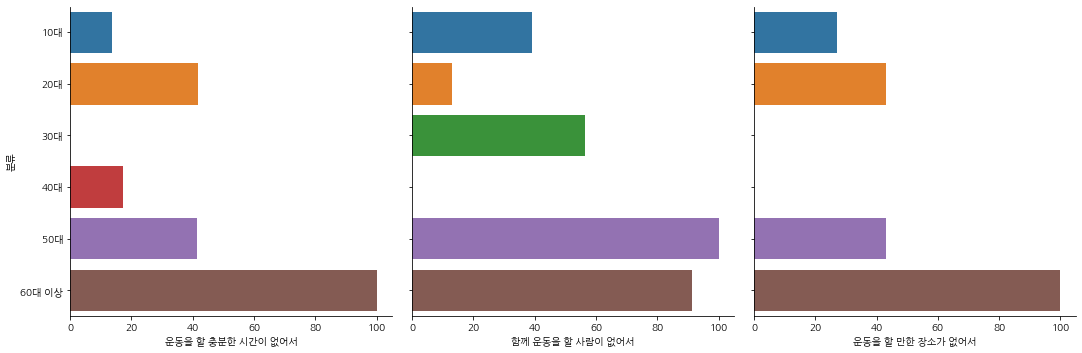

In [140]:
pg = sns.PairGrid(df_age, y_vars='분류', x_vars=col_list, height=5, aspect=1)
pg.map(sns.barplot)

> 연령대로 분석한 결과 60대는 전체적으로 높은 수치를 보이고 있어 별도로 홍보하지 않아도 이용을 할 것으로 예상되며 중간 데이터인 20대와 50대가 비슷한 수치로 나타나는 것을 볼 수 있어 홍보는 20와 50대를 기준으로 홍보를 하면 좋을 듯하다. 30대는 함께 운동을 할 사람이 없는 부분에서 높은 수치가 나타났으므로 PT추천은 30대에게 하는것이 좋을 듯 하다.